In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 3.2

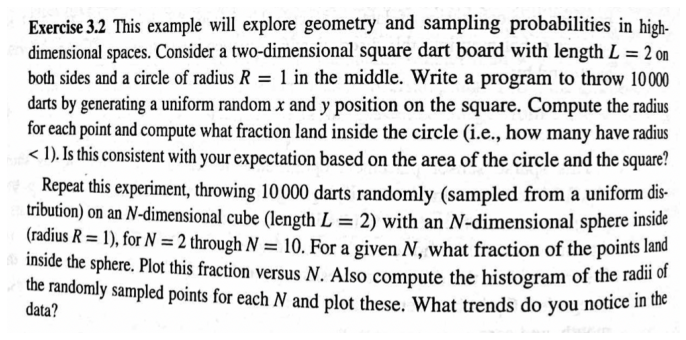

In [3]:
plt.figure(figsize=(15,6))
plt.imshow(plt.imread('./ex3.2.png'))
plt.axis('off');

# Exercise 3.3

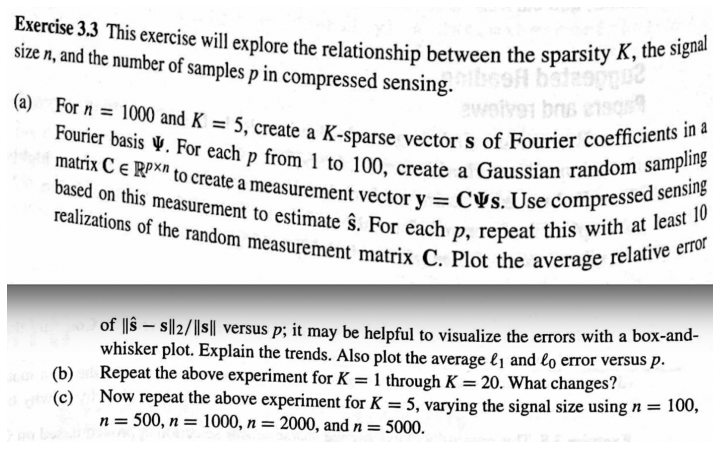

In [4]:
plt.figure(figsize=(15,8))
plt.imshow(plt.imread('./ex3.3.png'))
plt.axis('off');

# Exercise 3.6

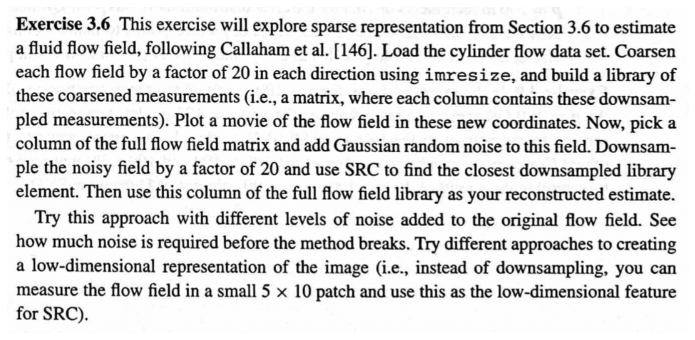

In [7]:
plt.figure(figsize=(15,6))
plt.imshow(plt.imread('./ex3.6.png'))
plt.axis('off');